In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Images Dimensions
img_width, img_height = 128, 128
# img_width, img_height = 224, 224
train_data_dir = 'datasets/train'
validation_data_dir = 'datasets/valid'

nb_train_samples = 800
nb_validation_samples = 240
epochs = 50
batch_size = 16

# TensorBoard Callbacks
callbacks = TensorBoard(log_dir='./Graph')

In [3]:
# Training Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Rescale Testing Data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Train Data Generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Testing Data Generator
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
class_mode='categorical')

Found 121 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [4]:
# # Feature Extraction Layer
# inputs = Input(shape=(img_width, img_height, 3))
# conv_layer = Conv2D(16, (5, 5), strides=(3,3), activation='relu')(inputs) 
# conv_layer = ZeroPadding2D(padding=(1,1))(conv_layer) 
# conv_layer = Conv2D(32, (5, 5), strides=(3,3), activation='relu')(conv_layer) 
# conv_layer = MaxPooling2D((2, 2))(conv_layer) 
# conv_layer = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(conv_layer) 
# conv_layer = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(conv_layer)

# # Flatten Layer
# flatten = Flatten()(conv_layer) 

# # Fully Connected Layer
# fc_layer = Dense(32, activation='relu')(flatten)
# outputs = Dense(6, activation='sigmoid')(fc_layer)

# model = Model(inputs=inputs, outputs=outputs)

# # Adam Optimizer and Cross Entropy Loss
# adam = Adam(lr=0.0001)
# model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# # Print Model Summary
# # print(model.summary())

In [5]:
# # pretrained
# import keras
# shape = (img_width, img_height, 3)
# trained_model = keras.applications.resnet50.ResNet50(include_top=False, 
#                                                     weights='imagenet', 
#                                                     input_tensor=None, 
#                                                     input_shape=shape, 
#                                                     pooling='max')
# model = keras.models.Sequential()
# model.add(trained_model)
# # model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(6, activation='softmax'))
# model.summary()

In [5]:
# keras model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Input, Model, Sequential
# mulai membuat arsitektur NN dengan tipe fully connected layer
from keras.layers import BatchNormalization, Dropout

In [6]:
# batch-conv-pool-dropout
shape = (img_width, img_height, 3)
input_layer    = Input(shape=shape)
batch = BatchNormalization(input_shape=shape)(input_layer)
conv = Conv2D(16, kernel_size=(5,5), padding='SAME', activation='relu', name='conv_layer_1')(batch)
pool = MaxPool2D(pool_size=(4,4), name='maxpooling_1')(conv)
drop = Dropout(0.25)(pool)

batch1 = BatchNormalization(input_shape=shape)(drop)
conv1 = Conv2D(16, kernel_size=(5,5), padding='SAME', activation='relu', name='conv_layer_2')(batch1)
pool1 = MaxPool2D(pool_size=(4,4), name='maxpooing_2')(conv1)
drop1 = Dropout(0.25)(pool1)

flatten_layer = Flatten(name='flatten_layer')(drop1)
full_con_layer = Dense(512, activation='relu', name='fully_connected_layer')(flatten_layer)
full_con_layer1 = Dense(128, activation='relu', name='fully_connected_layer_1')(full_con_layer)
drop3 = Dropout(0.5)(full_con_layer1)
output_layer = Dense(6, activation='softmax', name='output_layer')(drop3)
model = Model(inputs=input_layer, outputs=output_layer)
# model.summary()

In [7]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, 
    callbacks=[callbacks])

model.save('tinyDarknet-2.h5')

Epoch 1/50
50/50 [==============================] - 18s 370ms/step - loss: 0.4917 - acc: 0.8155 - val_loss: 0.4393 - val_acc: 0.8333
Epoch 2/50
50/50 [==============================] - 17s 335ms/step - loss: 0.4521 - acc: 0.8310 - val_loss: 0.4502 - val_acc: 0.8333
Epoch 3/50
50/50 [==============================] - 17s 341ms/step - loss: 0.4359 - acc: 0.8312 - val_loss: 0.4435 - val_acc: 0.8333
Epoch 4/50
50/50 [==============================] - 17s 334ms/step - loss: 0.4252 - acc: 0.8374 - val_loss: 0.4425 - val_acc: 0.8333
Epoch 5/50
50/50 [==============================] - 17s 332ms/step - loss: 0.4206 - acc: 0.8368 - val_loss: 0.4392 - val_acc: 0.8333
Epoch 6/50
50/50 [==============================] - 17s 334ms/step - loss: 0.4151 - acc: 0.8371 - val_loss: 0.4331 - val_acc: 0.8333
Epoch 7/50
50/50 [==============================] - 17s 344ms/step - loss: 0.4127 - acc: 0.8385 - val_loss: 0.4251 - val_acc: 0.8333
Epoch 8/50
50/50 [==============================] - 17s 330ms/step - 

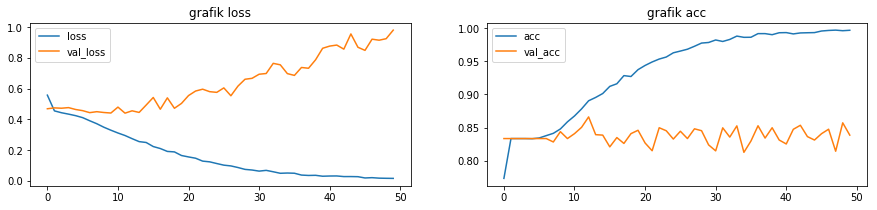

In [16]:
# nilai-nilai loss-nya
loss = history.history['loss']

# nilai-nilai val_loss-nya
val_loss = history.history['val_loss']

# nilai-nilai akurasi-nya
acc = history.history['acc']

# nilai-nilai val_acc-nya
val_acc = history.history['val_acc']

# menentukan sumbu x nya dari 0 sampai dengan banyaknya jumlah nilai loss/acc
sumbu_x = np.arange(0, len(loss))

# memasukan library plotting (matplotlib)
import matplotlib.pyplot as plt

# grafik plot untuk melihat loss
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.title('grafik loss')
plt.plot(sumbu_x, loss, label='loss')
plt.plot(sumbu_x, val_loss, label='val_loss')
plt.legend()

# grafik plot untuk melihat akurasinya
plt.subplot(1,2,2)
plt.title('grafik acc')
plt.plot(sumbu_x, acc, label='acc')
plt.plot(sumbu_x, val_acc, label='val_acc')
plt.legend()
plt.show()

In [31]:
model.save('batch-conv-pool-dropout.h5')